In [217]:
import numpy as num
import pandas as pd

In [218]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [219]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [220]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2891,ham,Babe? You said 2 hours and it's been almost 4 ...,NaN,NaN,NaN
4527,ham,HOW ARE U? I HAVE MISSED U! I HAVENT BEEN UP 2...,NaN,NaN,NaN
5291,ham,Xy trying smth now. U eat already? We havent...,NaN,NaN,NaN
1715,ham,Asking do u knw them or nt? May be ur frnds or...,NaN,NaN,NaN
1792,spam,WIN: We have a winner! Mr. T. Foley won an iPo...,NaN,NaN,NaN


In [221]:
df.shape

(5572, 5)

In [222]:
  #1. data celaning
 #2.EDA
 #3 text preprocessing
#4 model building
#5 evaluation
#6improvement
#7 website
#8 deploy 

In [223]:
 #DATA cleaning

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [225]:
df.drop(columns=['Unnamed: 2' ,'Unnamed: 3','Unnamed: 4'],inplace=True)

In [226]:
df.sample(5)

,v1,v2
3739,ham,No da. . Vijay going to talk in jaya tv
4263,ham,She just broke down a list of reasons why nobo...
503,ham,Lolnice. I went from a fish to ..water.?
1845,ham,Hi. || Do u want | to join me with sts later? ...
3239,ham,A cute thought for friendship: \Its not necess...


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [228]:
# renaming the col
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5522,ham,Thats cool. I want to please you...
4563,ham,Tell me again what your address is
1310,ham,"I.ll always be there, even if its just in spir..."
1803,ham,I'm in class. Did you get my text.
3551,ham,Lol u still feeling sick?


In [229]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [230]:
df['target']=encoder.fit_transform(df['target'])

In [231]:
  df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [232]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [233]:
df.duplicated().sum()

403

In [234]:
df = df.drop_duplicates(keep='first')

In [235]:
df.duplicated().sum()

0

In [236]:
df.shape

(5169, 2)

In [237]:
 #2.EDA
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [238]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

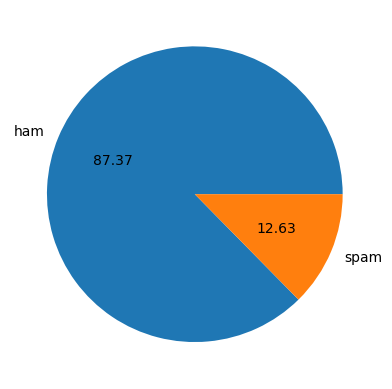

In [239]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [265]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
 

[nltk_data] Downloading package punkt to C:\Users\SD
[nltk_data]     BAJWA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SD
[nltk_data]     BAJWA\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\SD
[nltk_data]     BAJWA\AppData\Roaming\nltk_data...


True

In [267]:
df['num_characters']=df['text'].apply(len)

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '<your_custom_path>'
**********************************************************************


In [254]:
df.head()

,target,text,num_characters
0,111,"Go until jurong point, crazy.. Available only ...",111
1,29,Ok lar... Joking wif u oni...,29
2,155,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,49,U dun say so early hor... U c already then say...,49
4,61,"Nah I don't think he goes to usf, he lives aro...",61


In [259]:
df.describe()

,target,num_characters
count,5169.000000,5169.000000
mean,78.977945,78.977945
std,58.236293,58.236293
min,2.000000,2.000000
25%,36.000000,36.000000
50%,60.000000,60.000000
75%,117.000000,117.000000
max,910.000000,910.000000


In [260]:
df['target']==0

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Name: target, Length: 5169, dtype: bool

In [261]:
df['target']==1

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Name: target, Length: 5169, dtype: bool

In [262]:
import seaborn as sns

In [263]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_character'])


sns.histplot(df[df['target']==1]['num_character'],color='yellow')

KeyError: 'num_character'

<Figure size 1200x800 with 0 Axes>

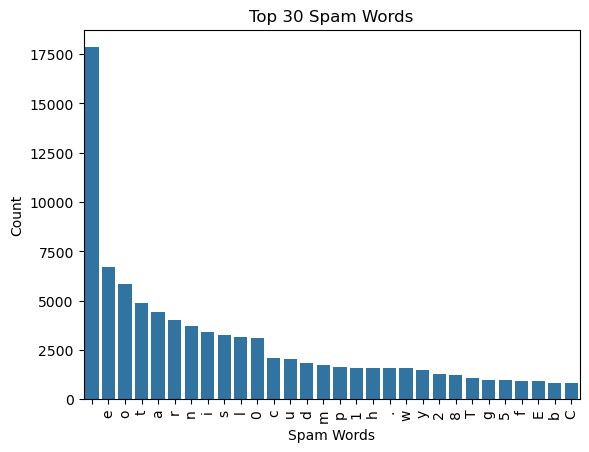

In [264]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_words).most_common(30))[0],y=pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xlabel('Spam Words') 
plt.ylabel('Count')   
plt.xticks(rotation='vertical')
plt.title('Top 30 Spam Words')
plt.show()